In [2]:
%matplotlib inline

from __future__ import print_function
import math
import itertools
import numpy
import numpy.linalg
import matplotlib.pyplot as plt

In [3]:
U = 1.0
J = 0.01
mu = 0.5
print('J/U:  %f' % (J / U))
print('mu/U: %f' % (mu / U))

J/U:  0.010000
mu/U: 0.500000


In [4]:
L = 3
nmax = 2
nstates = (nmax + 1) ** L
H = numpy.zeros((nstates,nstates))
states = numpy.empty((nstates, L), dtype=int)
print('#sites:                   %i' % L)
print('nmax:                     %i' % nmax)
print('Hilbert-space dimensions: %i' % nstates)

#sites:                   3
nmax:                     2
Hilbert-space dimensions: 27


In [5]:
istate=0
for state in itertools.product(range(nmax + 1), repeat=L):
    states[istate, :] = state[:]
    istate += 1
print('States enumeration completed')

States enumeration completed


In [6]:
# Fill matrix H
for istate1, state1 in enumerate(states):
    # Diagonal terms
    for site in xrange(L):
        H[istate1, istate1] += 0.5 * U * state1[site] * (state1[site] - 1.0)
        H[istate1, istate1] -= mu * state1[site]

    # Off-diagonal terms
    for istate2, state2 in enumerate(states):
        H[istate1, istate2] = 0.0
        for site in xrange(L):
            
            state1_site = state1[site]
            state2_site = state2[site]
            state1_site_p1 = state1[(site + 1) % L]
            state2_site_p1 = state2[(site + 1) % L]
            
            if ((state1_site == (state2_site + 1)) and
                (state1_site_p1 == (state2_site_p1 - 1))):
                H[istate1, istate2] -= J * math.sqrt(state1_site * (state1_site_p1 + 1.0))
                assert istate1 != istate2
            if ((state1_site_p1 == (state2_site_p1 + 1)) and
                (state1_site == (state2_site - 1))):
                H[istate1, istate2] -= J * math.sqrt(state1_site_p1 * (state1_site + 1.0))

print('All entries of H filled.')
print('Is the matrix H symmetric?', numpy.allclose(H, H.T))

All entries of H filled.
Is the matrix H symmetric? True


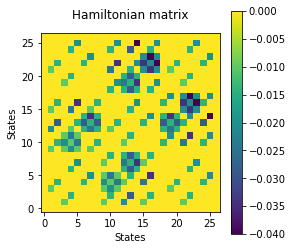

In [7]:
plt.matshow(H, origin='lower')
plt.title('Hamiltonian matrix')
plt.gca().xaxis.tick_bottom()
plt.colorbar()
plt.xlabel('States')
plt.ylabel('States')

In [24]:
evals, evecs = numpy.linalg.eigh(H)
indices = evals.argsort()
evals = evals[indices]
evecs = (evecs.T)[indices]
for ind in xrange(5):
    print('%i-th eigenvalue: %+f' % (ind, evals[ind]))

0-th eigenvalue: -0.142047 1.0
1-th eigenvalue: -0.067535 1.0
2-th eigenvalue: -0.057010 1.0
3-th eigenvalue: -0.057010 1.0
4-th eigenvalue: -0.040140 1.0


In [25]:
def average_on_site_density(site, coefficients, states):
    assert abs((coefficients ** 2).sum() - 1.0) < 1e-10
    dens = 0.0
    for istate, state in enumerate(states):
        dens += (coefficients[istate] ** 2) * state[site]
    return dens

for istate in xrange(nstates):
    ns = [average_on_site_density(site, evecs[istate], states) for site in xrange(L)]
    print('[%2i | E=%+f] <n_i>:' % (istate, evals[istate]), ns)


[ 0 | E=-0.142047] <n_i>: [1.139991164602828, 1.139991164602828, 1.1399911646028285]
[ 1 | E=-0.067535] <n_i>: [1.203204211907172, 1.2032042119071722, 1.203204211907172]
[ 2 | E=-0.057010] <n_i>: [1.0328382669818887, 1.0633607521099047, 1.2462303737599782]
[ 3 | E=-0.057010] <n_i>: [1.1954479949192895, 1.1649255097912738, 0.9820558881412017]
[ 4 | E=-0.040140] <n_i>: [0.65799870321396969, 0.65799870321396969, 0.65799870321396858]
[ 5 | E=-0.033277] <n_i>: [0.89904115717280275, 0.96483861565956697, 1.0372243926913958]
[ 6 | E=-0.033277] <n_i>: [1.0350282865097067, 0.96923082802294203, 0.89684505099111445]
[ 7 | E=-0.000000] <n_i>: [0.76615013501355722, 0.70253177253313936, 1.0962469319495907]
[ 8 | E=-0.000000] <n_i>: [1.0194199896610678, 1.4680983295468033, 0.61554836882166442]
[ 9 | E=-0.000000] <n_i>: [1.3310274294455517, 0.73440446654767699, 0.48187001862231094]
[10 | E=+0.000000] <n_i>: [0.0, 0.0, 0.0]
[11 | E=+0.000000] <n_i>: [2.0, 2.0, 2.0]
[12 | E=+0.000000] <n_i>: [1.017224659